In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
import tensorflow as tf
import os
import cv2
import imghdr

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.zip to dataset.zip


In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/clean/
  inflating: dataset/clean/1.jpeg    
  inflating: dataset/clean/2.jpeg    
  inflating: dataset/clean/20190322200103!Street_sweeping.jpg  
  inflating: dataset/clean/3.jpeg    
  inflating: dataset/clean/c1.jpg    
  inflating: dataset/clean/c10.jpg   
  inflating: dataset/clean/c12.jpg   
  inflating: dataset/clean/c14.jpg   
  inflating: dataset/clean/c15.jpg   
  inflating: dataset/clean/c16.jpg   
  inflating: dataset/clean/c17.jpg   
  inflating: dataset/clean/c18.jpg   
  inflating: dataset/clean/c19.jpg   
  inflating: dataset/clean/c2.jpg    
  inflating: dataset/clean/c20.jpg   
  inflating: dataset/clean/c21.jpg   
  inflating: dataset/clean/c22.jpg   
  inflating: dataset/clean/c23.jpg   
  inflating: dataset/clean/c25.jpg   
  inflating: dataset/clean/c26.jpg   
  inflating: dataset/clean/c3.jpg    
  inflating: dataset/clean/c5.jpg    
  inflating: dataset/clean/c7.jpg    
  inflating: dataset/clean/c9.jpg    
  inflating:

In [ ]:
data_dir = 'dataset'

In [ ]:
os.listdir(data_dir)
os.listdir(os.path.join(data_dir,'unclean'))

['g4.jpg',
 'Unclean (44).jpg',
 'images (19).jpeg',
 'g2.jpg',
 'Unclean (38).jpg',
 'g19.jpg',
 'images (13).jpeg',
 'unclean2.jpg',
 '4.jpeg',
 '11.jpeg',
 '5.jpeg',
 'images (20).jpeg',
 '13.jpeg',
 '7.jpeg',
 'unclean1.jpg',
 'images (18).jpeg',
 '8.jpeg',
 'images (16).jpeg',
 'Unclean (36).jpg',
 'images (15).jpeg',
 'Unclean (30).jpg',
 'Unclean (55).jpg',
 'Unclean (60).jpg',
 'Unclean (50).jpg',
 '2.jpeg',
 'Unclean (49).jpg',
 'Unclean (47).jpg',
 'g23.jpg',
 '12.jpeg',
 'images.jpeg',
 'Unclean (34).jpg',
 'Unclean (43).jpg',
 'g1.jpg',
 'Unclean (57).jpg',
 'images (17).jpeg',
 'g24.jpg',
 'Unclean (35).jpg',
 '6.jpeg',
 'Unclean (45).jpg',
 'unclean3.jpg',
 'Unclean (39).jpg',
 'Unclean (63).jpg',
 'images (14).jpeg',
 'Unclean (31).jpg',
 'g12.jpg',
 'Unclean (32).jpg',
 'g13.jpg',
 'Unclean (68).jpg',
 'Unclean (59).jpg',
 'Unclean (58).jpg',
 'Unclean (62).jpg',
 'g22.jpg',
 'Unclean (61).jpg',
 'images (22).jpeg',
 '1.jpeg',
 'Unclean (67).jpg',
 'Unclean (51).jpg',
 

In [ ]:
image_exts = ['jpg','jpeg','png','bmp']
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))
      #os.remove(image_path)

Image not in ext list dataset/clean/c12.jpg


In [ ]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('dataset')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
batch[0].shape
batch[1]

Found 170 files belonging to 2 classes.


array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int32)

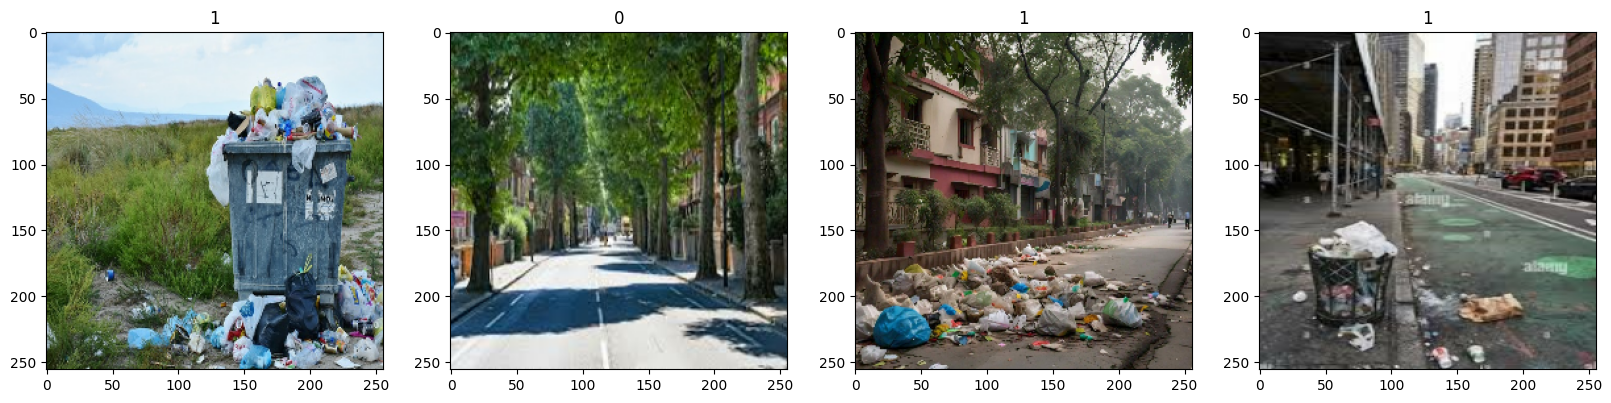

In [ ]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255,y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].max()
len(data)

6

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [ ]:
test_size

1

In [ ]:
train_size+val_size+test_size

6

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving logs.zip to logs.zip


In [ ]:
!unzip logs.zip

Archive:  logs.zip
 extracting: logs/hi.txt             


In [ ]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train,epochs=20,validation_data=val,validation_steps=20,callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5671 - loss: 1.0225

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.5646 - loss: 1.0225 - val_accuracy: 0.5625 - val_loss: 0.6826
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5188 - loss: 0.7048 - val_accuracy: 0.5000 - val_loss: 0.7134
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5813 - loss: 0.6086 - val_accuracy: 0.8125 - val_loss: 0.5127
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7458 - loss: 0.5559 - val_accuracy: 0.9062 - val_loss: 0.4851
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.8917 - loss: 0.4427 - val_accuracy: 0.9062 - val_loss: 0.3384
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8687 - loss: 0.3541 - val_accuracy: 0.8438 - val_loss: 0.3237
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8656 - loss: 0.3158 - val_accuracy: 0.9375 - val_loss: 0.1290
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9156 - loss: 0.2192 - val_accuracy: 0.7500 - val_loss: 0.5800
Epoch 9/20
4/4 ━━━━

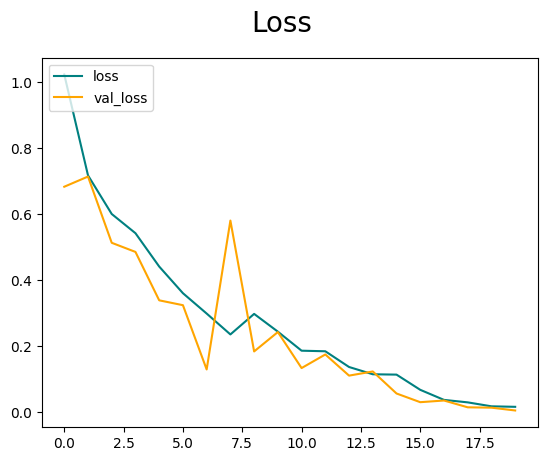

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

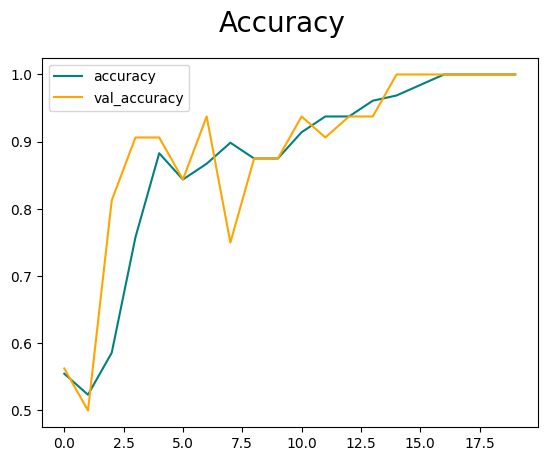

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Precision:1.0,Recall:1.0,Accuracy:1.0


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleantest.jpg to cleantest.jpg
Saving dirtytest.jpg to dirtytest.jpg


In [ ]:
import cv2

In [ ]:
img = cv2.imread('cleantest.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

NameError: name 'plt' is not defined

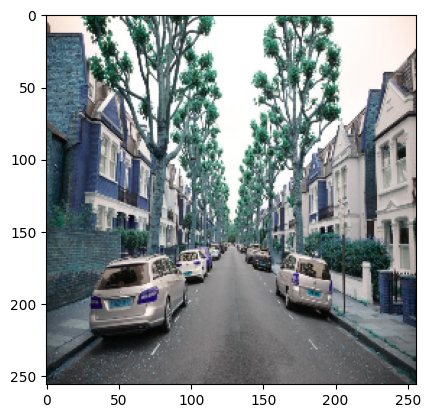

In [ ]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[0.00179789]], dtype=float32)

In [ ]:
if yhat > 0.5:
  print(f'Predicted class is dirty')
else:
  print(f'Predicted class is clean')

Predicted class is clean


In [ ]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','cleanuncleanmodel.h5'))
new_model = load_model(os.path.join('models','cleanuncleanmodel.h5'))
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


In [ ]:
if yhatnew > 0.5:
  print(f'Predicted class is dirty')
else:
  print(f'Predicted class is clean')

Predicted class is clean
